In [2]:
import cv2
import numpy as np
from PIL import Image,ImageDraw,ImageColor,ImageFont
import matplotlib.pyplot as plt
import matplotlib
import webcolors
import os

Size  1200 936
Image mode:  RGB


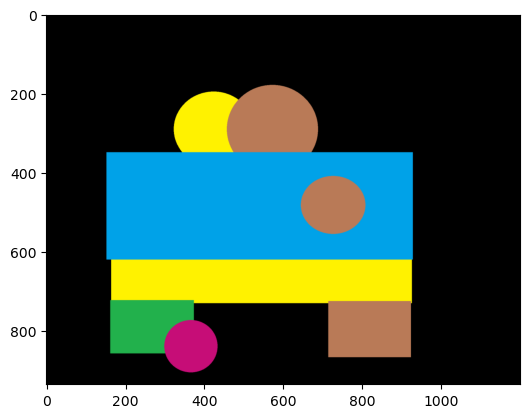

In [8]:
# file_name='resized0019_top_flat'
# file_name2="0019_top_flat"

file_name='resizedexample'
file_name2="example"

# Takes an image object and shows the image
def show_image(img):
    print("Size ",img.shape[1],img.shape[0])
    plt.imshow(img)
    img = Image.fromarray(img)
    print("Image mode: ",img.mode)
    
# Takes a list of image objects and show all of them
def show_imglist(img_list):
    for i in range(len(img_list)):
        print(img_list[i][1])
        plt.imshow(img_list[i][0], interpolation='nearest')
        plt.show()
    
def RGBImage(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Image converted to RGB")
    return img

file_path ='resized/'+file_name+'.png'
file_path2='sampleImages/'+file_name2+'.png'
cv_img = cv2.imread(file_path)
# cv_img=RGBImage(cv_img)

show_image(cv_img)

Log:	converting flat PNG to fill map...


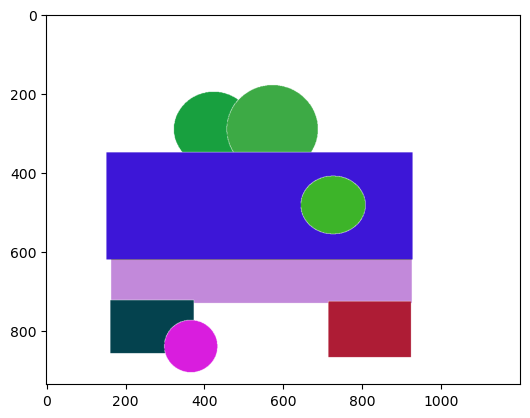

> c:\users\chuanyan\appdata\local\temp\ipykernel_275544\1258463847.py(67)fillmap_to_adjmatrix()

ipdb> Image.fromarray(region_mask).show()
ipdb> cv2.dilate(region_mask.astype(np.uint8), kernel = kernel, iterations = 1)
*** cv2.error: OpenCV(4.6.0) D:/bld/libopencv_1657598065368/work/modules/imgproc/src/morph.simd.hpp:649: error: (-215:Assertion failed) _kernel.type() == CV_8U in function 'cv::opt_AVX2::`anonymous-namespace'::MorphFilter<struct cv::opt_AVX2::`anonymous namespace'::MaxOp<unsigned char>,struct cv::opt_AVX2::A0x420a2c67::MorphVec<struct cv::opt_AVX2::`anonymous namespace'::VMax<struct cv::hal_AVX2::v_uint8x32> > >::MorphFilter'
ipdb> cv2.dilate(region_mask.astype(np.uint8)*255, kernel = kernel, iterations = 1).astype(bool)
*** cv2.error: OpenCV(4.6.0) D:/bld/libopencv_1657598065368/work/modules/imgproc/src/morph.simd.hpp:649: error: (-215:Assertion failed) _kernel.type() == CV_8U in function 'cv::opt_AVX2::`anonymous-namespace'::MorphFilter<struct cv::opt_AVX2::`anonymous 

In [ ]:
## Chuan's version
# convert flat image to fill map, the fill map is a numpy array 
# which has the same size as the flat image, and each pixel is assigned with 
# one region label
def flat_to_fillmap(flat):
    '''
    flat png to fillmap, assume the flat layer have been removed
    '''
    print("Log:\tconverting flat PNG to fill map...")
    h, w = flat.shape[0], flat.shape[1]
    r, g, b = flat[:,:,0], flat[:,:,1], flat[:,:,2]# split to r, g, b channel
    color_channel = r * 1e6 + g * 1e3 + b
    fill = np.zeros((h,w)) # line drawings or unrecognized regions will be assigned with label 0
    color_idx = 1
    color_map = [np.array([0,0,0])]
    thresh_color = h * w *0.0005 # threshold for the very small color regions (if there exsits)
    for c in np.unique(color_channel):
        mask = (color_channel == c).squeeze()
        if mask.sum() < thresh_color:
            fill[mask] = 0
            continue
        c_alpha = color_channel[mask]
        # find the majority color under current mask in alpha channel
        c_alpha_major, count = np.unique(c_alpha, return_counts = True)
        c_alpha = c_alpha_major[np.argmax(count)]
        # skip this color if the region is transparent
        if c_alpha == 0: continue
        # split current mask if it contains no-connect regions
        _, regions = cv2.connectedComponents(mask.astype(np.uint8), connectivity=4)
        for r in np.unique(regions):
            if r == 0: continue
            # record into the fillmap
            fill[regions == r] = color_idx
            # update color index and dict
            color_idx += 1
            color_map.append(int_to_color(c))
    return fill.astype(int), np.array(color_map).astype(np.uint8)

# helper function that convert merged color back to numpy array
def int_to_color(color):
    r = int(color//1e6)
    g = int(color%1e6//1e3)
    b = int(color % 1000)
    return np.array([r, g, b])

# visuialize a fillmap with its corresponding color map
# if colormap is not provided, fill each region with random color
def fillmap_to_color(fill, color_map=None):
    if color_map is None:
        color_map = np.random.randint(0, 255, (np.max(fill) + 1, 3), dtype=np.uint8)
        color_map[0] = [255, 255, 255]
        return color_map[fill]
    else:
        return color_map[fill]

# find the adjancency matrix of a given fill map
def fillmap_to_adjmatrix(fillmap):
    regions = np.unique(fillmap)
    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]]).astype(np.uint8)
    res = np.zeros((len(regions), len(regions)))
    for r0 in regions:
        if r0 == 0: continue
        region_mask = fillmap == r0
        # dilate the mask
        import pdb
        pdb.set_trace()
        region_mask_dilated = cv2.dilate(region_mask.astype(np.uint8)*255, kernel = kernel, iterations = 1).astype(bool)
        for r1 in np.unique(fillmap[regions_mask_dilated]):
            if r1 == 0: continue
            if r1 == r0: continue
            res[r0][r1] = True
    return res

## test with the input image, it should output exactly the same region with random colors
file_name='resizedexample'
file_path ='resized/'+file_name+'.png'
cv_img = cv2.imread(file_path)
fillmap, _ = flat_to_fillmap(cv_img)
img = fillmap_to_color(fillmap)
plt.imshow(img)
plt.show()
adj_matrix = fillmap_to_adjmatrix(fillmap)
plt.imshow(adj_matrix)
plt.show()
## compute the adjacency matrix


In [ ]:
def getRGBColorPalette(file_path):
    img=Image.open(file_path)
    colors = img.convert('RGB').getcolors()
    colorlist=[]

    for i in range(len(colors)):
        colorlist.append(colors[i][1])
        
    print("length:",len(colorlist))
    return colorlist

def getLowRGB(colorList):
    rgb_palette=colorList
    low_rgb=[]
    for i in rgb_palette:
        rgb1=i
        val=[]
        for i in range(len(rgb1)):
            if(rgb1[i]!=0):
                val.append(abs(rgb1[i] - 1))
            else:
                val.append(rgb1[i])
        rgb2=(val[0],val[1],val[2])
        np_rgb = np.asarray(rgb2)
        low_rgb.append(np_rgb)
    return low_rgb
    
def getHighRGB(colorList):
    rgb_palette=colorList
    high_rgb=[]
    for i in rgb_palette:
        rgb1=i
        val=[]
        for i in range(len(rgb1)):
            rgb2=(rgb1[0],rgb1[1],rgb1[2])
        np_rgb = np.asarray(rgb2)
        high_rgb.append(np_rgb)
    return high_rgb

#Returns Dilated image
def DilateImage2(img):
    cv2.imshow('Original', img)
    kernel = np.ones((5, 5), 'uint8')
    dilate_img = cv2.dilate(img, kernel, iterations=1)
    return dilate_img

#It takes rgbimage and the color pallete as input and returns dilated masked images
def GetMaskSegment(rgb_image,colorList):
    low=getLowRGB(colorList)
    high=getHighRGB(colorList)
    
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        res= DilateImage2(res)
        imglists.append([res,high[i]])
        
    return imglists

# Returns first round of masked images
def FirstMaskSegmentation():
    rgb_colorList=getRGBColorPalette(file_path2)
    img_list=GetMaskSegment(cv_img,rgb_colorList)
    return img_list

show_imglist(FirstMaskSegmentation())

In [ ]:
def apply_lut(src, lut):
    dst = lut[src]
    return dst

def ComponentLabeling(img):
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    n_components, component_ids = cv2.connectedComponents(mask)

    # Initialize look up tables with arbitrary data for demonstration
    LUT1 = np.linspace(0, 255, n_components).astype(np.uint16)
    LUT2 = np.linspace(255, 0, n_components).astype(np.uint16)
    LUT3 = np.linspace(50, 150, n_components).astype(np.uint16)
    LUT2[0] = 0
    
    r = apply_lut(component_ids, LUT1)
    g = apply_lut(component_ids, LUT2)
    b = apply_lut(component_ids, LUT3)

    rgb = np.dstack((r, g, b)).astype(np.uint8)
    
    return rgb

def RGBtoGrayImage(rgbimg):
    grayImage = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return im_bw

# Takes list of images and does labelling for each of the images in the list and returns new labelled image list
def GetLabel_imglist(img_list):
    label_imglist=[]
    for i in range(len(img_list)):
        gray_im=RGBtoGrayImage(img_list[i][0])
        label_img=ComponentLabeling(gray_im)
        label_imglist.append([label_img,img_list[i][1]])
    return label_imglist

img_list=FirstMaskSegmentation()
show_imglist(GetLabel_imglist(img_list))

In [ ]:
def RemoveSpecificValue(input_list,val):
    new_list=[]
    for i in input_list:
        if(i!=val):
            new_list.append(i)
    return new_list

def GetBgPixVal(img):
    [r,g,b] = img[0, 0]
#     a='#%02x%02x%02x' % (r,g,b)
    return [r,g,b]

def hexTOrgb(input_list):
    print("converting hexlist to rgblist...")
    rgb_list=[]
    for i in input_list:
        rgb_list.append(ImageColor.getcolor(i, "RGB"))
    return rgb_list

def getColorPalette(img):
    unq_pix= np.unique(img.reshape(-1, img.shape[2]), axis=0)
    value=GetBgPixVal(img)
    unq_pix=unq_pix.tolist()
    if value in unq_pix:
        del unq_pix[unq_pix.index(value)]
    return unq_pix

def GetSecondMaskSegment(rgb_image,colorList):
    low=getLowRGB(colorList)
    high=getHighRGB(colorList)
    
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        imglists.append(res)
        
    return imglists


# Creates mask for each of the labelled images. and returns a new list.
def SecondMaskSegmentation():
    img_list2=[]
    img_list=FirstMaskSegmentation()
    label_imglist=GetLabel_imglist(img_list)
    for i in range(len(label_imglist)):
        img=label_imglist[i][0]
        colorname=label_imglist[i][1]
        colorlist=getColorPalette(img)
        sec_imglist=GetSecondMaskSegment(img,colorlist)
        for j in sec_imglist:
            img_list2.append([j,colorname])
    return img_list2
        
show_imglist(SecondMaskSegmentation())

In [ ]:
region_list=SecondMaskSegmentation()
region_colorlist=[]
for i in range(len(region_list)):
    colorval=tuple(region_list[i][1])
    colorval='#%02x%02x%02x' % colorval
    region_colorlist.append(colorval)
print(region_colorlist)

In [ ]:
def DilateImage(img):
    cv2.imshow('Original', img)
    kernel = np.ones((5, 5), 'uint8')
    dilate_img = cv2.dilate(img, kernel, iterations=2)
#     plt.imshow(dilate_img, interpolation='nearest')
#     plt.show()
    
    return dilate_img

def CheckConnectivity(img):
    connection=False
    unq_val=np.unique(img.reshape(-1, img.shape[2]), axis = 0)
    total_unqval= len(unq_val)-1
    if(total_unqval==1):
        connection=True
    else:
        connection=False
    return connection

def RegionConnectivity(region1, region2):
#     region1=DilateImage(region1)
#     region2=DilateImage(region2)
    merged_region=region1+region2
    merged_region=RGBtoGrayImage(merged_region)
    merged_region=ComponentLabeling(merged_region)
    plt.imshow(merged_region, interpolation='nearest')
    plt.show()
    check_con=CheckConnectivity(merged_region)
    return check_con

In [ ]:
from pyvis.network import Network
net=Network()
    
region_clrlist=[]
node_list=[]
edge_list=[]
for k in range(len(region_list)):
    print("loop ",k)
    compare_img=region_list[k][0]
    for i in range(len(region_list)):
        if(i!=k):
            colorval=tuple(region_list[i][1])
            colorval='#%02x%02x%02x' % colorval
            node_list.append(i)
            region_clrlist.append(colorval)
            check= RegionConnectivity(compare_img,region_list[i][0])
            if(check==True):
                edge_tuple=(k,i)
                edge_list.append(edge_tuple)

                                                      
print(edge_list)
print(region_clrlist)

net.add_nodes(node_list,label=region_clrlist,color=region_clrlist)
net.add_edges(edge_list)
    
net.show("hello.html") 